In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import chi2_contingency

In [20]:
# task 1

df = pd.DataFrame((24, 108, 61, 14),index = ('Exellent', 'Pretty Good', 'Only Fair', 'Poor'))
df.rename(columns = {0: 'Frequency'}, inplace = True)
df

,Frequency
Exellent,24
Pretty Good,108
Only Fair,61
Poor,14


###### task 1 a

Ho: Customers are satisfied

Ha: Customers are not satisfied

In [23]:
alpha = 0.05
observed_data = [24, 108, 61, 14]
n = len(observed_data)
dof = n-1
expected_frequency = sum(observed_data)/n

In [24]:
# b

crit = chi2.ppf(1-alpha, dof)
crit

7.814727903251179

In [30]:
# c

chi = 0
for i in observed_data:
    chi += (i-expected_frequency)**2/expected_frequency
    
pval = norm.sf(abs(chi),dof)
print(f"""
Critical val = {crit}
P-value = {pval}
Test-statistics = {chi}""")


Critical val = 7.814727903251179
P-value = 0.0
Test-statistics = 105.21256038647343


In [31]:
# d

if pval > alpha and chi<crit:
    print('Null hypothesis accepted')
else:
    print('reject null hypothesis')

reject null hypothesis


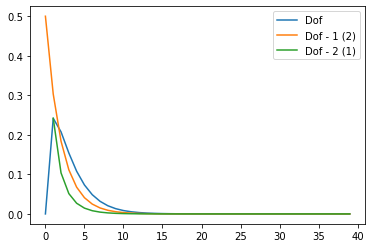

In [38]:
x = np.arange(0, 40)
plt.plot(x, chi2.pdf(x, dof), label = 'Dof')
plt.plot(x, chi2.pdf(x, df=dof-1), label = 'Dof - 1 (2)')
plt.plot(x, chi2.pdf(x, df=dof-2), label = 'Dof - 2 (1)')
plt.legend()

###### task 2 a

Ho: Bedroom count dependent on number of floors

Ha: Bedroom count independent of number number of floors

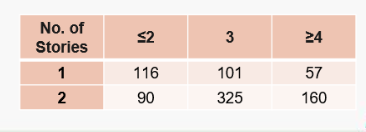

In [44]:
alpha = 0.1
observed_data = [[116, 90], [101, 325], [57, 160]]

In [54]:
statistic , pval, df, expected = chi2_contingency(observed_data)

In [55]:
# b

crit = chi2.ppf(1-alpha, df)
crit

4.605170185988092

In [56]:
# c

chis = 0
for i in observed_data:
    chis += (i-expected)**2/expected_frequency
    
chis

array([[  72.14097843,  720.29768453],
       [ 159.81345246, 1106.39592801],
       [  62.64312707,  678.47037482]])

In [57]:
statistic

72.33176626617666

In [58]:
pval

1.9649727053475884e-16

In [59]:
# d

if pval > alpha and chis<crit:
    print('Null hypothesis accepted')
else:
    print('reject null hypothesis')

reject null hypothesis


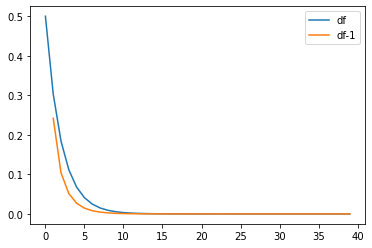

In [63]:
x = np.arange(40)
plt.plot(x, chi2.pdf(x, df), label = 'df')
plt.plot(x, chi2.pdf(x, df-1), label = 'df-1')
plt.legend()